# Temperature Prediction

Submitted by: Sindhu Shree N

Batch Number: 1832

The main aim of this project is to build a model to predict the target variables namely Next_Tmax and Next_Tmin by using the given features.

In [192]:
#importing all the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import pickle
import warnings
warnings.filterwarnings("ignore")

# Examining the data:

In [193]:
df=pd.read_csv("temperature.csv")
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [194]:
df.tail()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3
7751,NaN,NaN,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,37.6450,127.135,212.3350,5.178230,5992.895996,38.9,29.8


In [195]:
df.sample(5)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
4457,8.0,23-08-2015,30.3,21.9,40.917759,79.299286,30.937428,23.478903,10.210491,48.419207,...,0.000000,0.000000,0.000000,37.4697,126.910,52.5180,1.5629,4708.868164,30.9,24.4
4357,8.0,19-08-2015,30.2,25.3,58.298115,82.853828,28.131312,24.485626,5.981002,33.374368,...,0.000000,0.000000,0.000000,37.4697,126.910,52.5180,1.5629,4852.797852,28.7,24.1
5863,14.0,17-08-2016,33.8,26.2,42.703968,74.432793,35.216554,26.852192,5.798141,24.559698,...,0.000000,0.023703,0.000000,37.4967,126.927,30.9680,0.6180,4891.187012,34.7,26.5
3627,3.0,21-07-2015,28.8,23.2,46.167789,89.174355,32.411263,25.515283,5.425145,12.214899,...,0.000482,0.000000,0.004195,37.5776,127.058,33.3068,0.2661,5627.421875,31.6,24.9
316,17.0,12-07-2013,24.6,23.1,93.685272,96.727539,25.387851,22.595611,5.179363,19.011651,...,4.778020,1.111083,0.805845,37.6181,127.099,53.4712,0.6970,5768.783203,25.3,22.2


So by observing the above dataset we can clearly say that the dataset contains only numerical values and there are 7752 rows.

In [196]:
df.shape

(7752, 25)

So as we said above the dataset contains 7752 rows and 25 columns.

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


We can see all our dataset features are off float type but only date is off object type.

In [198]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [199]:
#summary Statistics
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


1.We can observe that mean is greater than median in LDAPS_RHmin,LDAPA_WS,LDAPS_LH,DEM features.

2.There is a large difference between 75th percentile and the maximum values in the same above mentioned features so there is a probability of having large number of outliers in these features.

Here we need to predict two features hence our target features are Next_Tmax and Next_Tmin.

In [200]:
#checking unique values of target features
df['Next_Tmax'].value_counts()

29.3    113
33.0    106
31.3    104
29.6    101
31.2     98
       ... 
20.9      1
18.9      1
18.6      1
37.4      1
19.7      1
Name: Next_Tmax, Length: 183, dtype: int64

So there are many unique features but the most repeating is 29.3 which is recurring 113 times.

In [201]:
df['Next_Tmin'].value_counts()

23.5    159
23.4    157
24.0    156
23.2    150
23.8    149
       ... 
13.6      1
12.9      1
28.2      1
29.5      1
13.4      1
Name: Next_Tmin, Length: 157, dtype: int64

Similar to Next_Tmax it also contains many unique values and 23.5 is the most occuring minimum temperature.

# Data Visualization:

# Univariate Analysis:

<AxesSubplot:xlabel='station', ylabel='count'>

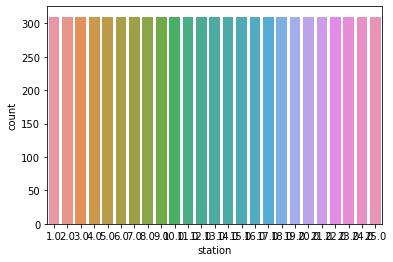

In [202]:
sns.countplot(df['station'])

<AxesSubplot:xlabel='station', ylabel='Count'>

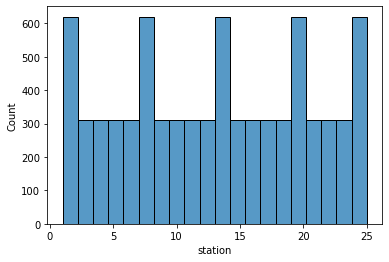

In [203]:
sns.histplot(df['station'])

So we can see data distribution is not normal.

<AxesSubplot:xlabel='LDAPS_RHmin', ylabel='Count'>

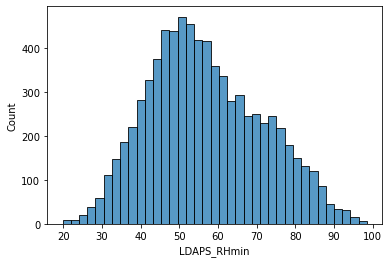

In [204]:
sns.histplot(df['LDAPS_RHmin'])

We are obtaining a nearly normal curve with slight skewness.

<AxesSubplot:xlabel='LDAPS_LH', ylabel='Count'>

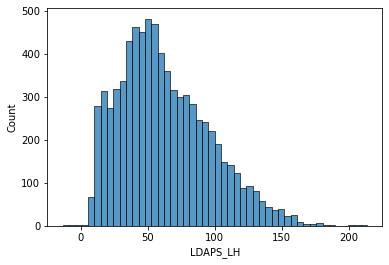

In [205]:
sns.histplot(df['LDAPS_LH'])

Here the curve has a right skewness.

<AxesSubplot:xlabel='lat', ylabel='count'>

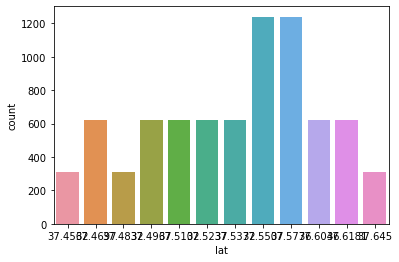

In [206]:
sns.countplot(df['lat'])

Here the data is not normally distributed.

<AxesSubplot:xlabel='lon', ylabel='count'>

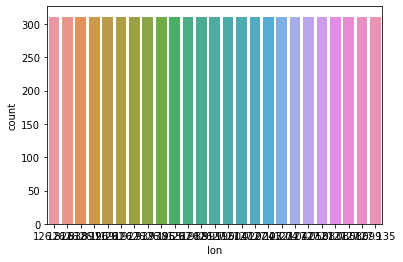

In [207]:
sns.countplot(df['lon'])

<AxesSubplot:xlabel='DEM', ylabel='count'>

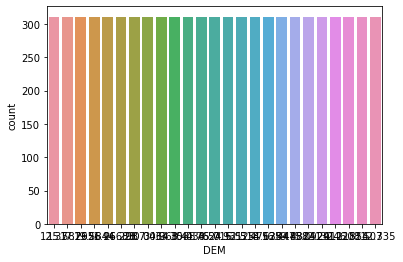

In [208]:
sns.countplot(df['DEM'])

<AxesSubplot:xlabel='Slope', ylabel='Count'>

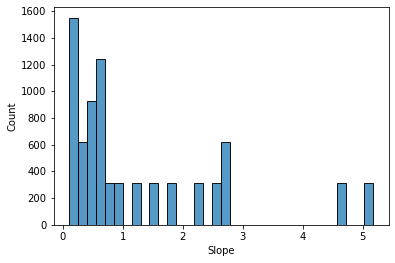

In [209]:
sns.histplot(df['Slope'])

<AxesSubplot:xlabel='Solar radiation', ylabel='Count'>

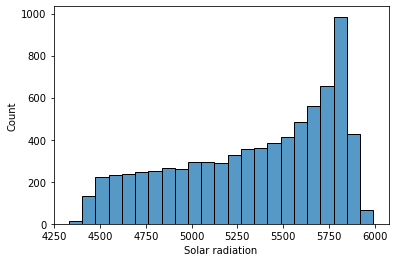

In [210]:
sns.histplot(df['Solar radiation'])

 In the above four graphs the data is not normally distributed.

<AxesSubplot:xlabel='Next_Tmax', ylabel='count'>

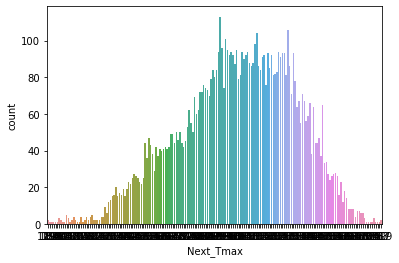

In [211]:
sns.countplot(df['Next_Tmax'])

<AxesSubplot:xlabel='Next_Tmin', ylabel='count'>

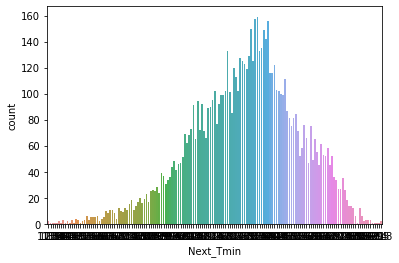

In [212]:
sns.countplot(df['Next_Tmin'])

The above two graphs has a left skewed distribution.

# Bivariate analysis:

Let us compare all the input features with the target variable.

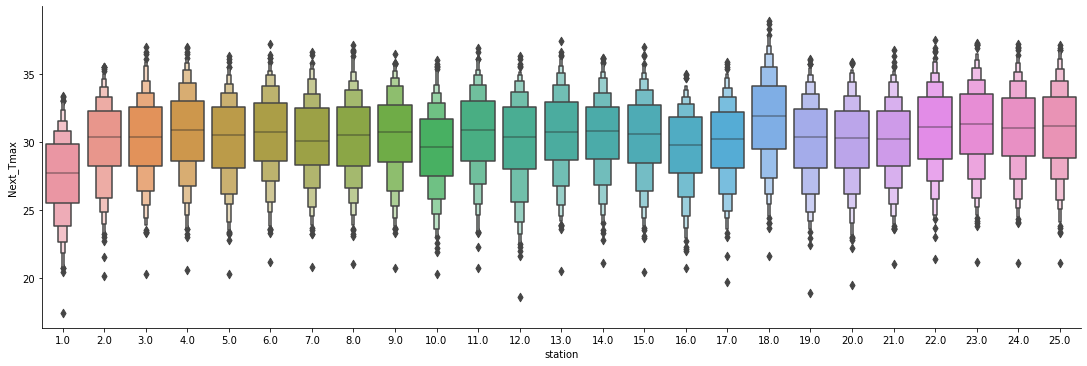

In [213]:
sns.catplot(x='station',y='Next_Tmax',data=df,kind='boxen',aspect=3)

So we can see that at station 18.0 we have highest Next_Tmax.

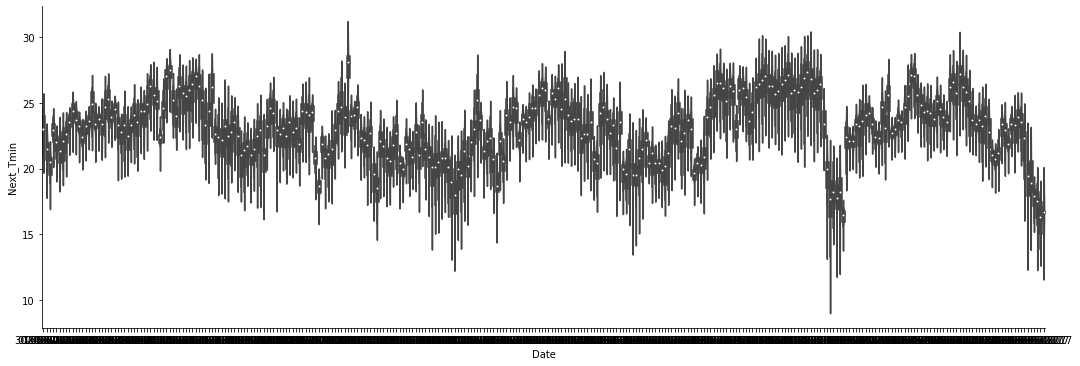

In [214]:
sns.catplot(x='Date',y='Next_Tmin',data=df,kind='violin',aspect=3)

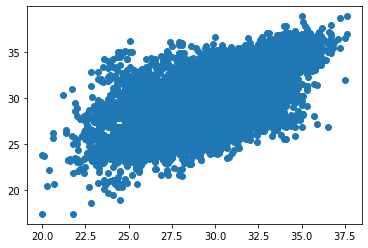

In [215]:
plt.scatter(df['Present_Tmax'],df['Next_Tmax'])

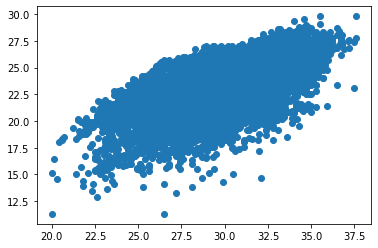

In [216]:
plt.scatter(df['Present_Tmax'],df['Next_Tmin'])

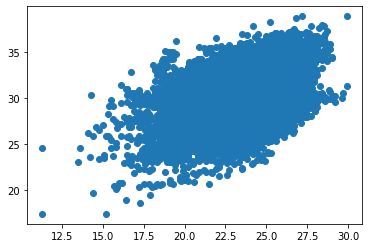

In [217]:
plt.scatter(df['Present_Tmin'],df['Next_Tmax'])

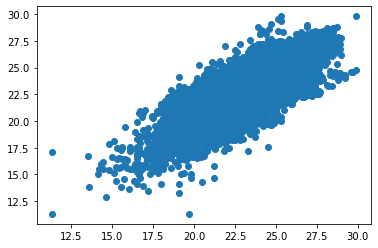

In [218]:
plt.scatter(df['Present_Tmin'],df['Next_Tmin'])

So we can see that the Present_Tmax and Present_Tmin are having a positive effect on our target variables.

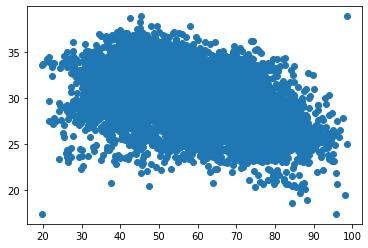

In [219]:
plt.scatter(df['LDAPS_RHmin'],df['Next_Tmax'])

So LDAPS_RHmin is having a slightly negative relation. So we will cross check this in correlation table.

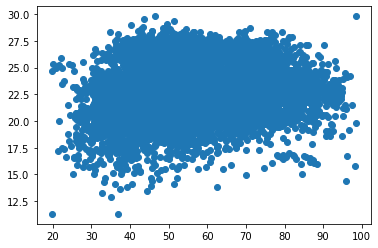

In [220]:
plt.scatter(df['LDAPS_RHmin'],df['Next_Tmin'])

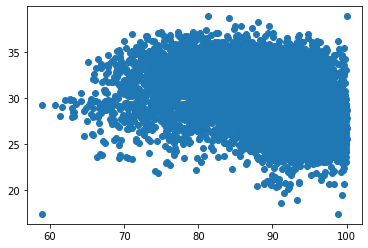

In [221]:
plt.scatter(df['LDAPS_RHmax'],df['Next_Tmax'])

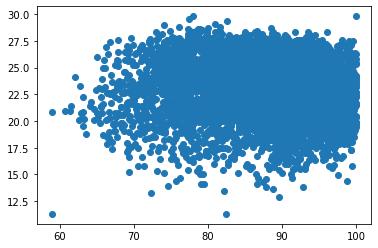

In [222]:
plt.scatter(df['LDAPS_RHmax'],df['Next_Tmin'])

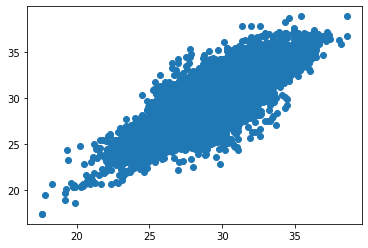

In [223]:
plt.scatter(df['LDAPS_Tmax_lapse'],df['Next_Tmax'])

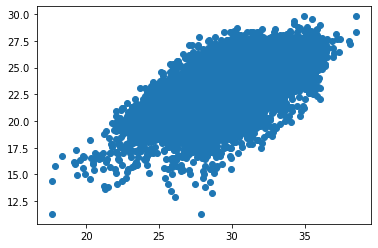

In [224]:
plt.scatter(df['LDAPS_Tmax_lapse'],df['Next_Tmin'])

So LDAPS_Tmax_lapse is having a positive curve with the target variables.

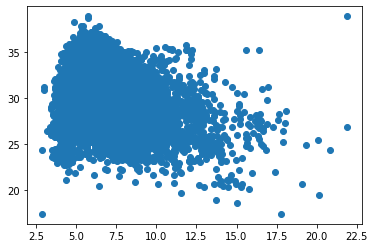

In [225]:
plt.scatter(df['LDAPS_WS'],df['Next_Tmax'])

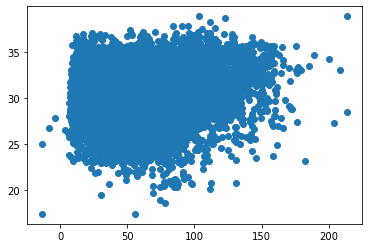

In [226]:
plt.scatter(df['LDAPS_LH'],df['Next_Tmax'])

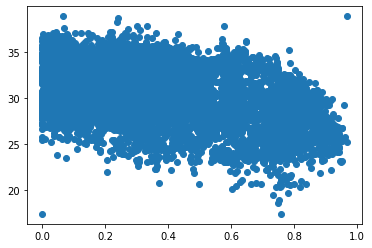

In [227]:
plt.scatter(df['LDAPS_CC1'],df['Next_Tmax'])

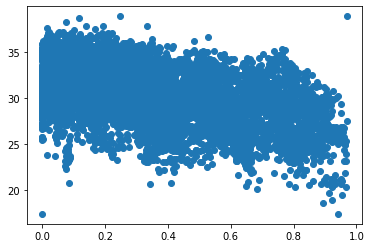

In [228]:
plt.scatter(df['LDAPS_CC2'],df['Next_Tmax'])

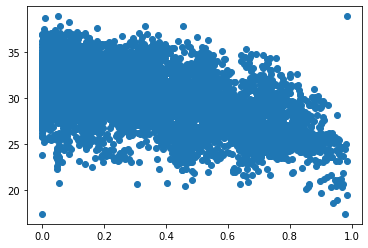

In [229]:
plt.scatter(df['LDAPS_CC3'],df['Next_Tmax'])

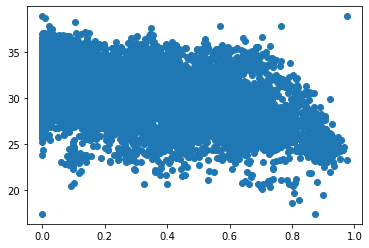

In [230]:
plt.scatter(df['LDAPS_CC4'],df['Next_Tmax'])

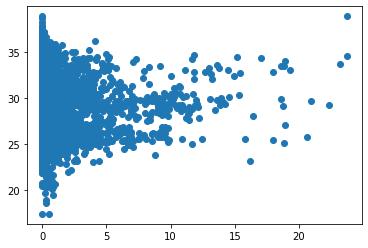

In [231]:
plt.scatter(df['LDAPS_PPT1'],df['Next_Tmax'])

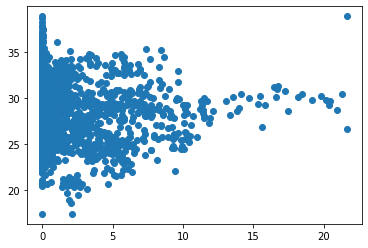

In [232]:
plt.scatter(df['LDAPS_PPT2'],df['Next_Tmax'])

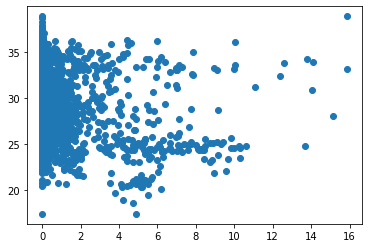

In [233]:
plt.scatter(df['LDAPS_PPT3'],df['Next_Tmax'])

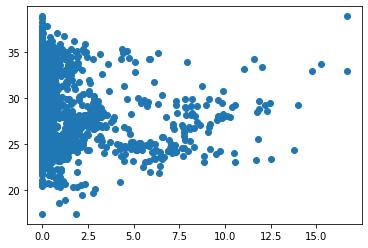

In [234]:
plt.scatter(df['LDAPS_PPT4'],df['Next_Tmax'])

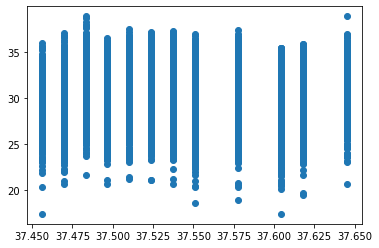

In [235]:
plt.scatter(df['lat'],df['Next_Tmax'])

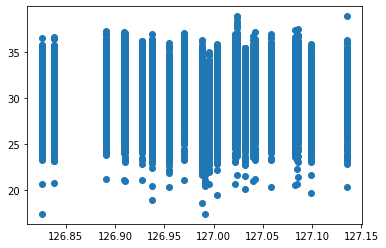

In [236]:
plt.scatter(df['lon'],df['Next_Tmax'])

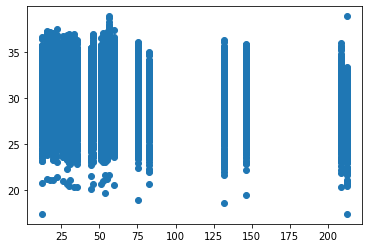

In [237]:
plt.scatter(df['DEM'],df['Next_Tmax'])

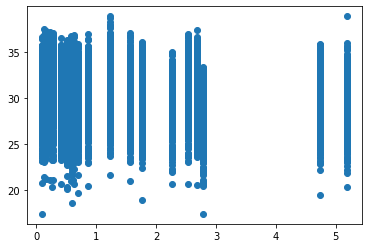

In [238]:
plt.scatter(df['Slope'],df['Next_Tmax'])

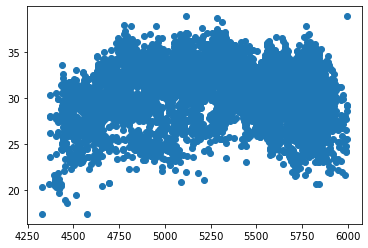

In [239]:
plt.scatter(df['Solar radiation'],df['Next_Tmax'])

<AxesSubplot:>

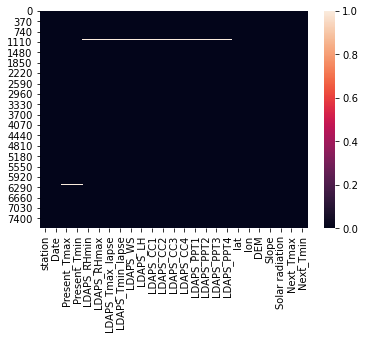

In [240]:
sns.heatmap(df.isnull())

In [241]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

There are null values in several features so let us drop those values.

In [242]:
df.drop(list(np.where(pd.isnull(df))[0]),inplace=True)
df.shape

(7588, 25)

In [243]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

Thus null values are dropped

# Correlation:

In [244]:
dfcorr=df.corr()
dfcorr

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000,0.113301,0.133282,-0.067846,-0.169351,0.069856,0.105277,0.005822,-0.132129,0.006539,...,-0.007635,-0.013865,-0.011085,-0.239118,-0.118845,-0.256706,-0.091721,-0.021194,0.107747,0.128184
Present_Tmax,0.113301,1.000000,0.615208,-0.209059,-0.306943,0.573777,0.628705,-0.125952,0.134246,-0.316333,...,-0.104779,-0.127248,-0.107295,-0.054134,0.007695,-0.189439,-0.107079,-0.022114,0.610357,0.621048
Present_Tmin,0.133282,0.615208,1.000000,0.122200,-0.018576,0.467904,0.772061,-0.038779,-0.012817,0.084348,...,0.066207,-0.052428,-0.070391,-0.081417,-0.045174,-0.254084,-0.148423,0.059765,0.463523,0.796975
LDAPS_RHmin,-0.067846,-0.209059,0.122200,1.000000,0.578358,-0.569580,0.085237,0.289422,-0.072195,0.612831,...,0.389572,0.237512,0.167311,0.085027,-0.077590,0.100684,0.122454,0.242168,-0.446824,0.093249
LDAPS_RHmax,-0.169351,-0.306943,-0.018576,0.578358,1.000000,-0.377293,-0.118965,0.131269,0.238986,0.435937,...,0.227581,0.132436,0.118101,0.194820,0.025563,0.176557,0.219436,0.146622,-0.289788,-0.076415
LDAPS_Tmax_lapse,0.069856,0.573777,0.467904,-0.569580,-0.377293,1.000000,0.653425,-0.316011,0.043663,-0.440878,...,-0.248369,-0.193749,-0.170415,-0.044052,0.091568,-0.181433,-0.163891,0.047414,0.835729,0.589963
LDAPS_Tmin_lapse,0.105277,0.628705,0.772061,0.085237,-0.118965,0.653425,1.000000,-0.134652,-0.139675,0.008714,...,-0.002743,-0.093116,-0.103541,-0.099452,-0.024703,-0.198396,-0.187864,0.157763,0.592119,0.886513
LDAPS_WS,0.005822,-0.125952,-0.038779,0.289422,0.131269,-0.316011,-0.134652,1.000000,0.004427,0.285349,...,0.181634,0.147199,0.134428,0.033025,-0.063009,0.188540,0.169223,0.120630,-0.351107,-0.102021
LDAPS_LH,-0.132129,0.134246,-0.012817,-0.072195,0.238986,0.043663,-0.139675,0.004427,1.000000,-0.148314,...,-0.084375,0.009495,0.012372,0.133309,0.024476,0.056362,0.087517,-0.044956,0.156779,-0.060392
LDAPS_CC1,0.006539,-0.316333,0.084348,0.612831,0.435937,-0.440878,0.008714,0.285349,-0.148314,1.000000,...,0.389368,0.166763,0.088897,-0.010268,-0.007962,-0.017378,-0.023893,0.218285,-0.459705,-0.012877


<AxesSubplot:>

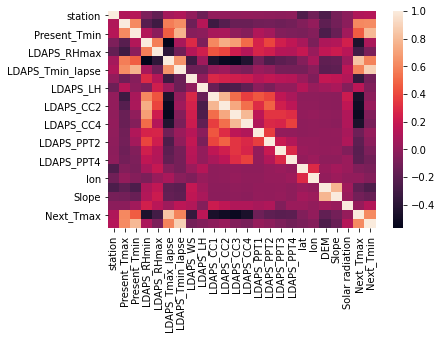

In [245]:
sns.heatmap(dfcorr)

<AxesSubplot:>

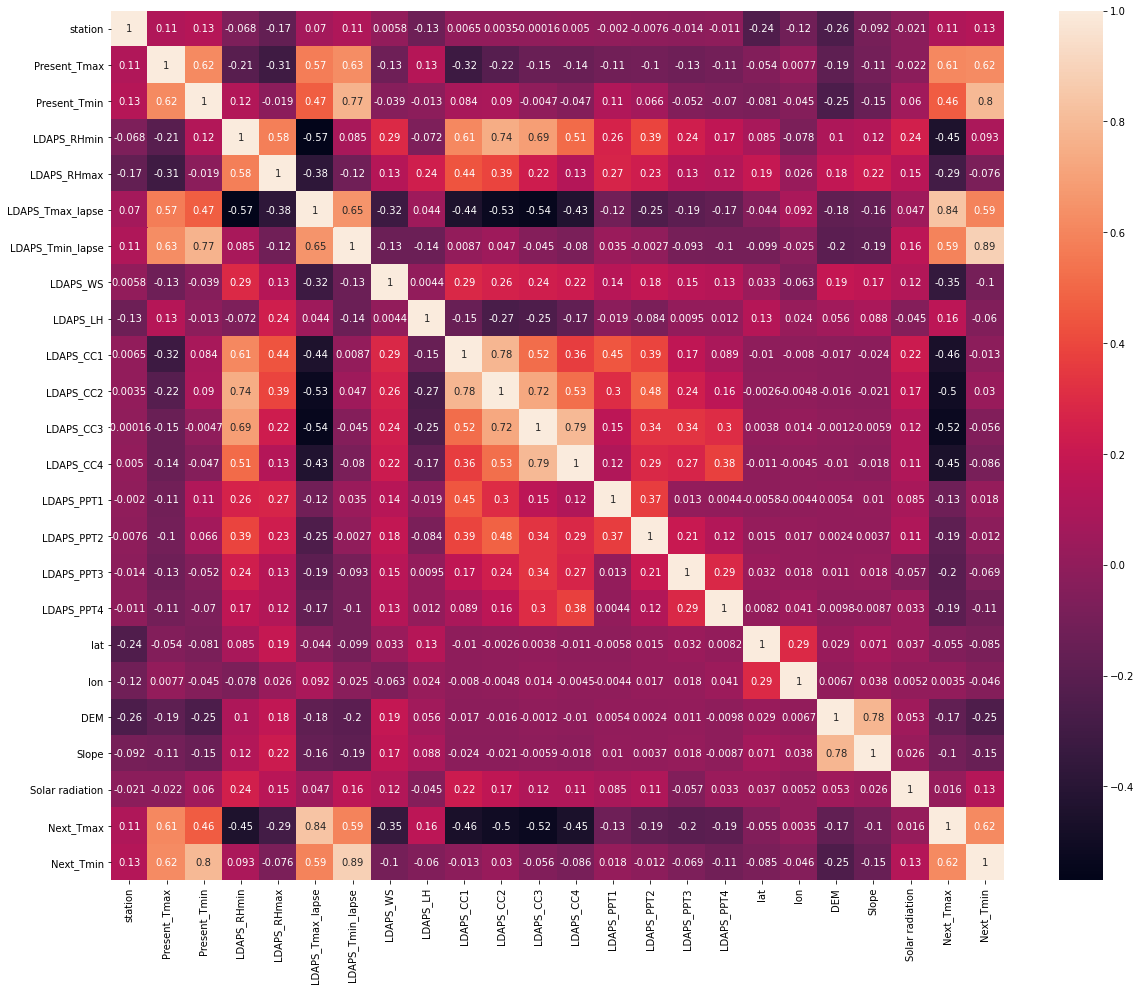

In [246]:
plt.figure(figsize=(20,16))
sns.heatmap(dfcorr,annot=True)

As we discussed above we can see that our target variables has a highly negative correlation with LDAPS_RHmin,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4. So let us drop those features.

Since the 'Date' feature is not contributing much to our target we can drop it.

In [247]:
df.drop(['LDAPS_RHmin','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4','Date'],axis=1,inplace=True)
df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,28.7,21.4,91.116364,28.074101,23.006936,6.818887,69.451805,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,31.9,21.6,90.604721,29.850689,24.035009,5.691890,51.937448,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,31.6,23.3,83.973587,30.091292,24.565633,6.138224,20.573050,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,32.0,23.4,96.483688,29.704629,23.326177,5.650050,65.727144,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,31.4,21.9,90.155128,29.113934,23.486480,5.735004,107.965535,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


# Plotting Outliers:

In [248]:
df.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

<AxesSubplot:>

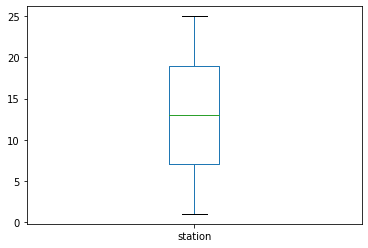

In [249]:
df['station'].plot.box()

<AxesSubplot:>

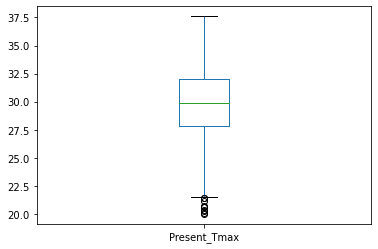

In [250]:
df['Present_Tmax'].plot.box()

<AxesSubplot:>

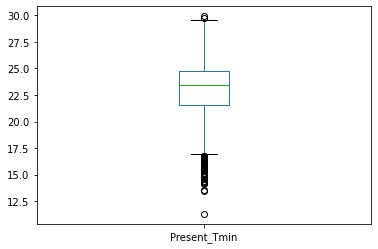

In [251]:
df['Present_Tmin'].plot.box()

<AxesSubplot:>

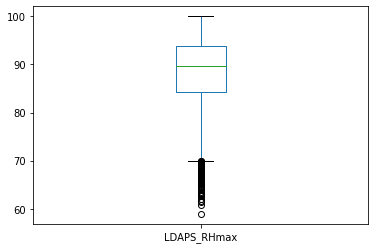

In [252]:
df['LDAPS_RHmax'].plot.box()

<AxesSubplot:>

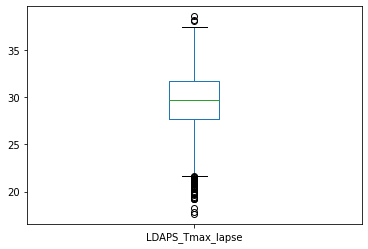

In [253]:
df['LDAPS_Tmax_lapse'].plot.box()

<AxesSubplot:>

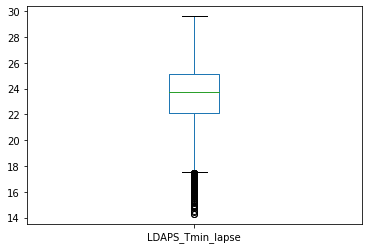

In [254]:
df['LDAPS_Tmin_lapse'].plot.box()

<AxesSubplot:>

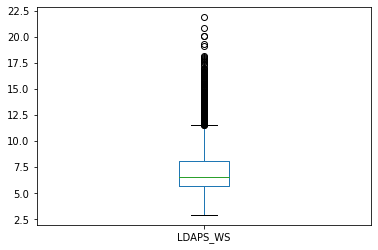

In [255]:
df['LDAPS_WS'].plot.box()

<AxesSubplot:>

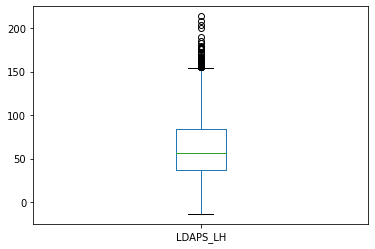

In [256]:
df['LDAPS_LH'].plot.box()

<AxesSubplot:>

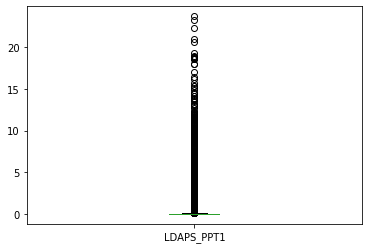

In [257]:
df['LDAPS_PPT1'].plot.box()

<AxesSubplot:>

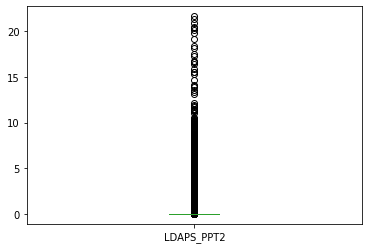

In [258]:
df['LDAPS_PPT2'].plot.box()

<AxesSubplot:>

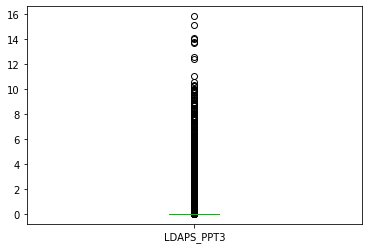

In [259]:
df['LDAPS_PPT3'].plot.box()

<AxesSubplot:>

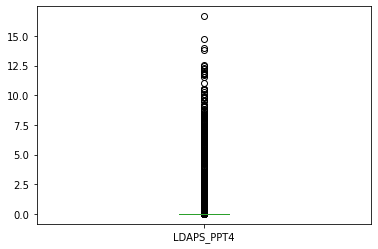

In [260]:
df['LDAPS_PPT4'].plot.box()

<AxesSubplot:>

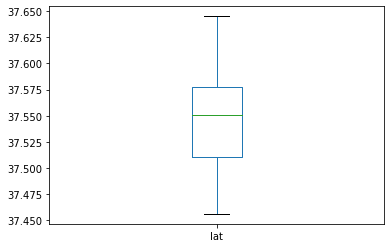

In [261]:
df['lat'].plot.box()

<AxesSubplot:>

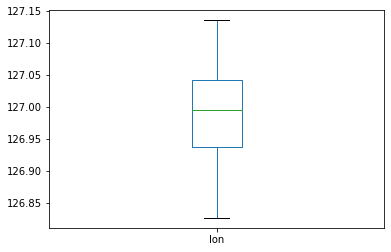

In [262]:
df['lon'].plot.box()

<AxesSubplot:>

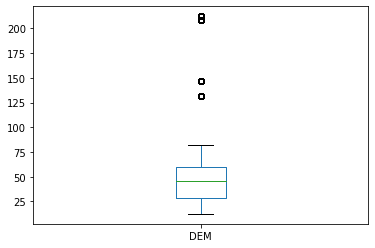

In [263]:
df['DEM'].plot.box()

<AxesSubplot:>

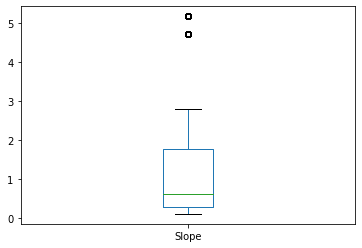

In [264]:
df['Slope'].plot.box()

<AxesSubplot:>

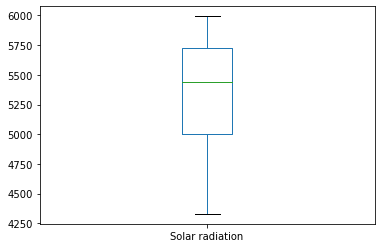

In [265]:
df['Solar radiation'].plot.box()

<AxesSubplot:>

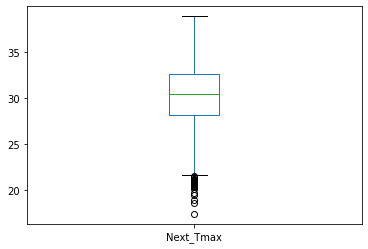

In [266]:
df['Next_Tmax'].plot.box()

<AxesSubplot:>

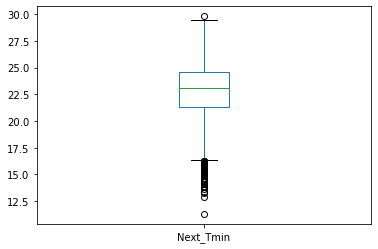

In [267]:
df['Next_Tmin'].plot.box()

So we can see that except 'station','lat','lon','Solar radiation' all are having outliers so now we will remove those outliers.

<AxesSubplot:xlabel='LDAPS_LH', ylabel='Density'>

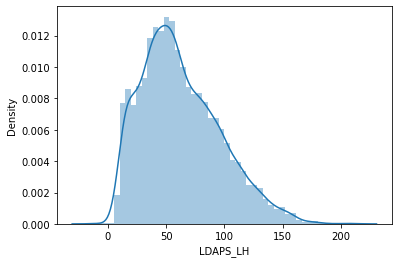

In [268]:
sns.distplot(df['LDAPS_LH'])

<AxesSubplot:xlabel='Solar radiation', ylabel='Density'>

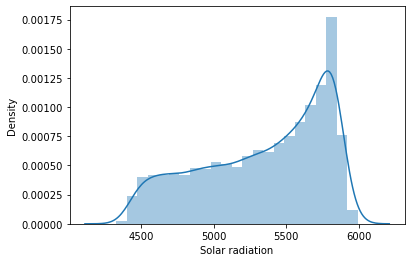

In [269]:
sns.distplot(df['Solar radiation'])

<AxesSubplot:xlabel='Next_Tmax', ylabel='Density'>

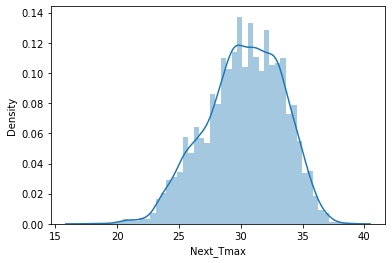

In [270]:
sns.distplot(df['Next_Tmax'])

<AxesSubplot:xlabel='Next_Tmin', ylabel='Density'>

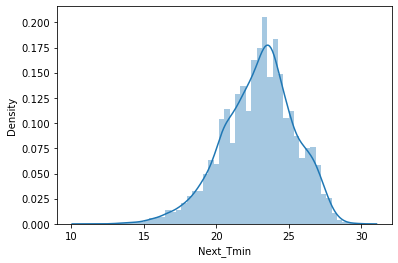

In [271]:
sns.distplot(df['Next_Tmin'])

# Removing Outliers:

In [272]:
z=np.abs(zscore(df))
z

array([[1.66460654, 0.35331763, 0.74802891, ..., 1.51056517, 0.36686121,
        0.68926525],
       [1.52605214, 0.72513836, 0.66472063, ..., 1.22299734, 0.08306779,
        0.1655135 ],
       [1.38749775, 0.62403311, 0.0433998 , ..., 1.20960169, 0.27589451,
        0.39852685],
       ...,
       [1.38359018, 2.17321212, 2.53915704, ..., 2.09517477, 0.6239635 ,
        1.93821173],
       [1.52214457, 2.17321212, 2.28923218, ..., 2.10667071, 0.52755014,
        1.65619156],
       [1.66069897, 2.20691387, 2.41419461, ..., 2.07648676, 0.78465243,
        2.2202319 ]])

In [273]:
threshold=3
print(np.where(z>3))

(array([  25,   25,   26, ..., 7581, 7582, 7582], dtype=int64), array([6, 9, 9, ..., 2, 2, 5], dtype=int64))


In [274]:
df_new=df[(z<3).all(axis=1)]
df_new.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,28.7,21.4,91.116364,28.074101,23.006936,6.818887,69.451805,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,31.9,21.6,90.604721,29.850689,24.035009,5.691890,51.937448,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,31.6,23.3,83.973587,30.091292,24.565633,6.138224,20.573050,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,32.0,23.4,96.483688,29.704629,23.326177,5.650050,65.727144,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,31.4,21.9,90.155128,29.113934,23.486480,5.735004,107.965535,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


# Normalizing:

In [275]:
#using Standard scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled=sc.fit_transform(df)
scaled

array([[-1.66460654, -0.35331763, -0.74802891, ...,  1.51056517,
        -0.36686121, -0.68926525],
       [-1.52605214,  0.72513836, -0.66472063, ...,  1.22299734,
         0.08306779, -0.1655135 ],
       [-1.38749775,  0.62403311,  0.0433998 , ...,  1.20960169,
         0.27589451,  0.39852685],
       ...,
       [ 1.38359018, -2.17321212, -2.53915704, ..., -2.09517477,
        -0.6239635 , -1.93821173],
       [ 1.52214457, -2.17321212, -2.28923218, ..., -2.10667071,
        -0.52755014, -1.65619156],
       [ 1.66069897, -2.20691387, -2.41419461, ..., -2.07648676,
        -0.78465243, -2.2202319 ]])

In [276]:
x=df.drop('Next_Tmax',axis=1)
y=df['Next_Tmax']

In [277]:
x1=df.drop('Next_Tmin',axis=1)
y1=df['Next_Tmin']

# Checking and removing skewness:

In [278]:
df.skew()

station            -0.004178
Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmax        -0.845264
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.574035
LDAPS_WS            1.553926
LDAPS_LH            0.662971
LDAPS_PPT1          5.305906
LDAPS_PPT2          5.710360
LDAPS_PPT3          6.356670
LDAPS_PPT4          6.681256
lat                 0.085377
lon                -0.289048
DEM                 1.721617
Slope               1.559050
Solar radiation    -0.524325
Next_Tmax          -0.334842
Next_Tmin          -0.393662
dtype: float64

In [279]:
from sklearn.preprocessing import power_transform
power_transform(x,method="yeo-johnson")

array([[-1.85793136, -0.40014321, -0.78589419, ...,  1.31197876,
         1.85249841, -0.7366652 ],
       [-1.64707819,  0.70965228, -0.70806284, ..., -0.38716761,
         1.39858337, -0.23142722],
       [-1.45438283,  0.60075018, -0.0140243 , ..., -0.95027186,
         1.37832482,  0.35220967],
       ...,
       [ 1.3101266 , -2.01375687, -2.26761853, ..., -1.28103075,
        -1.74973637, -1.80150872],
       [ 1.42520815, -2.01375687, -2.08263413, ..., -1.07386748,
        -1.7556299 , -1.57807572],
       [ 1.53907899, -2.04057179, -2.17599925, ..., -0.93617266,
        -1.74010124, -2.01515573]])

# Splitting the data:

In [280]:
#keeping Next_Tmax as target feature
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.2)

In [281]:
#keeping Next_Tmin as Target feature
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,random_state=1,test_size=0.2)

# Using Regression models:

# Linear Regression:

In [282]:
#for Next_Tmax
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)
print(lr.score(x_train,y_train)*100)

78.08566044944872


In [283]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print("error:")

print('Mean absolute error:', mean_absolute_error(y_test,y_pred_lr))
print('Mean squared error:', mean_squared_error(y_test,y_pred_lr))

print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,y_pred_lr)))

error:
Mean absolute error: 1.1147672450830057
Mean squared error: 2.054093471315282
Root mean squared error: 1.4332108956169995


In [284]:
#r2_score
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred_lr)*100)

78.84878492161619


In [285]:
#for Next_Tmin
lr=LinearRegression()
lr.fit(x1_train,y1_train)
y_pred_lr1=lr.predict(x1_test)
print(lr.score(x1_train,y1_train)*100)

84.92867251046184


In [286]:
print("error:")

print('Mean absolute error:', mean_absolute_error(y_test,y_pred_lr1))
print('Mean squared error:', mean_squared_error(y_test,y_pred_lr1))

print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,y_pred_lr1)))

error:
Mean absolute error: 7.347300209478188
Mean squared error: 59.258166344926636
Root mean squared error: 7.69793260199949


# Decision Tree Regressor:

In [287]:
#for Next_Tmax
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)
print(dt.score(x_train,y_train)*100)

100.0


In [288]:
#for Next_Tmin
dt = DecisionTreeRegressor()
dt.fit(x1_train,y1_train)
y_pred_dt1 = dt.predict(x1_test)
print(dt.score(x1_train,y1_train)*100)

100.0


# GradientBoosting Regressor:

In [289]:
#for Next_Tmax
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
y_pred_gbr=gbr.predict(x_test)
print(gbr.score(x_train,y_train)*100)

85.73762050370311


In [290]:
#for Next_Tmin
gbr=GradientBoostingRegressor()
gbr.fit(x1_train,y1_train)
y_pred_gbr1=gbr.predict(x1_test)
print(gbr.score(x1_train,y1_train)*100)

90.48400272620167


# KNeighbors Regressor:

In [291]:
#for Next_Tmax
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)
print(knn.score(x_train,y_train)*100)

63.06335857784728


In [292]:
#for Next_Tmin
knn=KNeighborsRegressor()
knn.fit(x1_train,y1_train)
y_pred_knn=knn.predict(x1_test)
print(knn.score(x1_train,y1_train)*100)

67.33192782610912


We are not getting a good accuracy here.

# Random Forest Regressor:

In [293]:
#for Next_Tmax
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)
print(rf.score(x_train,y_train)*100)

98.32794250596008


In [294]:
#for Next_Tmin
rf=RandomForestRegressor()
rf.fit(x1_train,y1_train)
y_pred_rf1=rf.predict(x1_test)
print(rf.score(x1_train,y1_train)*100)

98.6427875221754


# Cross validation score:

In [295]:
print(cross_val_score(lr,x,y,cv=5).mean()*100)

73.26746589490783


In [296]:
print(cross_val_score(rf,x,y,cv=5).mean()*100)

71.69020465822575


In [297]:
print(cross_val_score(gbr,x,y,cv=5).mean()*100)

72.15474669972228


In [298]:
print(cross_val_score(lr,x1,y1,cv=5).mean()*100)

80.20390698510617


In [299]:
print(cross_val_score(gbr,x1,y1,cv=5).mean()*100)

80.93079989022026


In [300]:
print(cross_val_score(rf,x1,y1,cv=5).mean()*100)

79.41199195179856


So we are getting accuracy_score and the cross_val_score nearby for both in linear regression model so we will choose it for further process.

# Hyper Parameter Tuning:

In [301]:
#using five hyper parameters for tuning for Next_Tmax
from sklearn.model_selection import GridSearchCV
parameters = { "fit_intercept":[True,False], 
              "normalize":[False,True], 
              "copy_X":[True,False], 
              "n_jobs":[0.1,0.22,-1,-2], 
              "positive":[False,True]
              }
grid = GridSearchCV(estimator=lr, param_grid = parameters, cv = 5)
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [0.1, 0.22, -1, -2],
                         'normalize': [False, True],
                         'positive': [False, True]})

In [302]:
best_parameters=grid.best_params_
print(best_parameters)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 0.1, 'normalize': True, 'positive': False}


In [303]:
(grid.best_score_)*100

77.8525394431437

In [304]:
clf=LinearRegression(fit_intercept=True, n_jobs= 0.1, normalize= True, positive= True,copy_X=True)
clf.fit(x_train,y_train)

LinearRegression(n_jobs=0.1, normalize=True, positive=True)

In [305]:
clf.score(x_test,y_test)*100

76.19541992840969

In [306]:
#using five hyper parameters for tuning for Next_Tmin
parameters = { "fit_intercept":[True,False], 
              "normalize":[False,True], 
              "copy_X":[True,False], 
              "n_jobs":[0.1,0.22,-1,-2], 
              "positive":[False,True]
              }
grid = GridSearchCV(estimator=lr, param_grid = parameters, cv = 5)
grid.fit(x1_train, y1_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [0.1, 0.22, -1, -2],
                         'normalize': [False, True],
                         'positive': [False, True]})

In [307]:
best_parameters=grid.best_params_
print(best_parameters)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 0.1, 'normalize': False, 'positive': False}


In [308]:
(grid.best_score_)*100

84.80472071424089

In [309]:
clf=LinearRegression(copy_X=True,fit_intercept=True, n_jobs= 0.1, normalize= False, positive= False)
clf.fit(x1_train,y1_train)

LinearRegression(n_jobs=0.1)

In [310]:
clf.score(x1_test,y1_test)*100

84.17635256987252

So we can see that our model is hitting the accuracy of 84%. Thus we obtained a perfect model. Let us proceed with the further evaluation.

# Further Evaluation:

In [311]:
Final_mod1 = LinearRegression()
Final_mod1.fit(x1_train,y1_train)
pred = Final_mod1.predict(x1_test)
print((lr.score(x1_test,y1_test)*100))

84.17635256987252


# Saving the best model:

In [312]:
import pickle
filename = 'Finalmodel.pkl'
pickle.dump(Final_mod1, open(filename,"wb"))
print("Model saved")

Model saved


Conclusion:

In [313]:
#Next_Tmax
result1=pd.DataFrame({})
preds=lr.predict(x_test)
result1['Predicted Next_Tmax']=preds
result1['Actual Next_Tmax']=y_test.values
result1

,Predicted Next_Tmax,Actual Next_Tmax
0,23.102339,28.9
1,19.809484,28.7
2,19.956396,31.0
3,20.724496,31.9
4,21.195539,27.3
...,...,...
1513,25.332057,32.7
1514,21.851572,31.8
1515,24.276169,34.4
1516,21.692754,34.7


In [314]:
#Next_Tmin
result2=pd.DataFrame({})
preds=lr.predict(x1_test)
result2['Predicted Next_Tmin']=preds
result2['Actual Next_Tmin']=y_test.values
result2

,Predicted Next_Tmin,Actual Next_Tmin
0,24.016476,28.9
1,21.190847,28.7
2,21.601843,31.0
3,22.573085,31.9
4,22.089362,27.3
...,...,...
1513,26.632163,32.7
1514,23.639217,31.8
1515,25.840360,34.4
1516,23.744484,34.7


Thus the test data and train data are balanced and hit the accuracy of 78% in Next_Tmax and 84% in Next_Tmin.